In [21]:
os.listdir('Images_filtered/image_0')

['low', 'high', 'medium']

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import visualization as vis
import utilities as utils
import os

In [15]:
def imshow(image):
    
    # Display the image in the notebook
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide axis
    plt.show()

erge

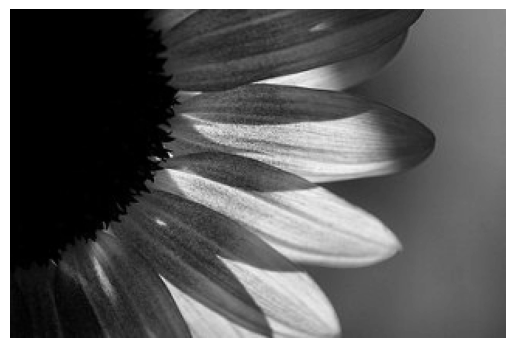

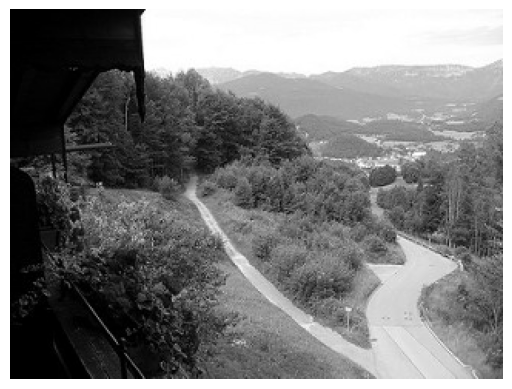

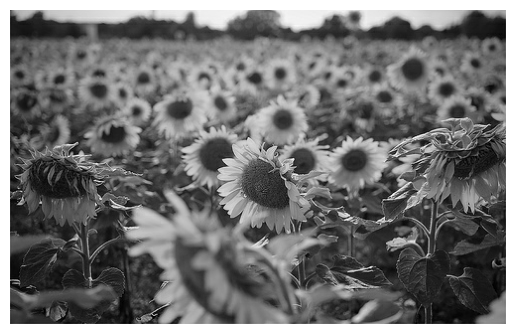

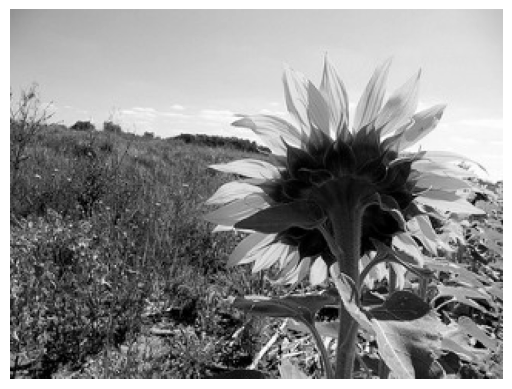

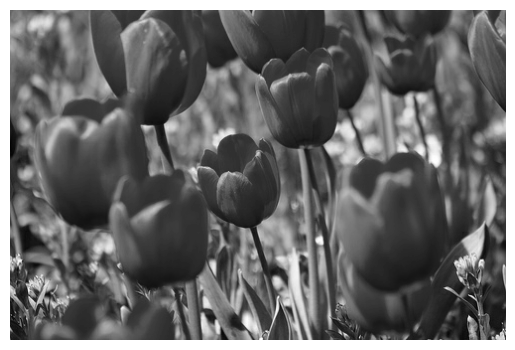

In [16]:
list_of_images = []
PATH = 'images'
images_dir = os.listdir(PATH)

# Iterate over images
for images in images_dir:  # Taking first 10 images for example
    image = cv2.imread(os.path.join(PATH, images), cv2.IMREAD_GRAYSCALE)
    # Convert from RGB to Grayscale using OpenCV
    list_of_images.append(image)
    
    imshow(image)


In [17]:
dataframes = []

for image in list_of_images:
    df = utils.create_dataframe_image(image)
    dataframes.append(df)

# ex = dataframes[4].loc['Salt_and_Pepper_prob_0.05', 'Image']
# Display the image in the notebook
# imshow(ex)



In [19]:
# Iterate over all images and save in a tree structured directory

for i in range(len(dataframes)):
    utils.save_filtered_images(dataframes[i], f'image_{i}')

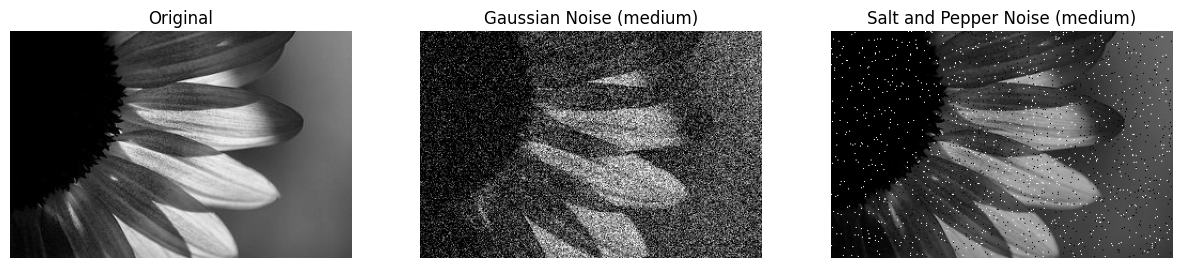

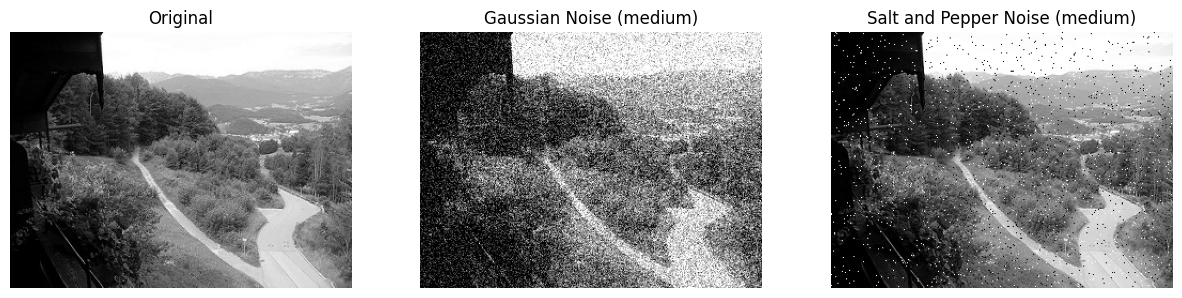

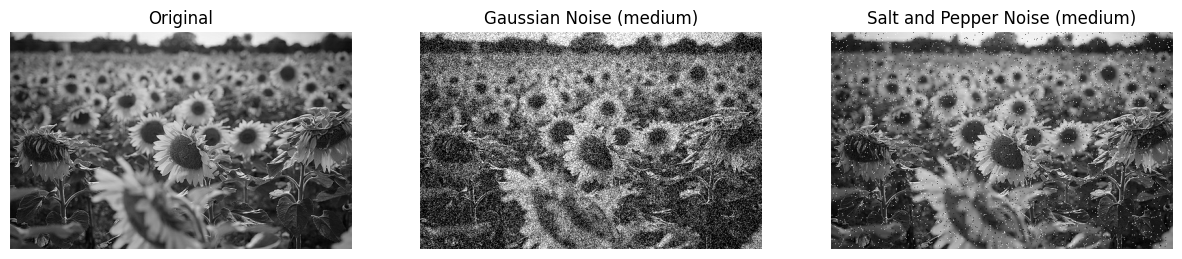

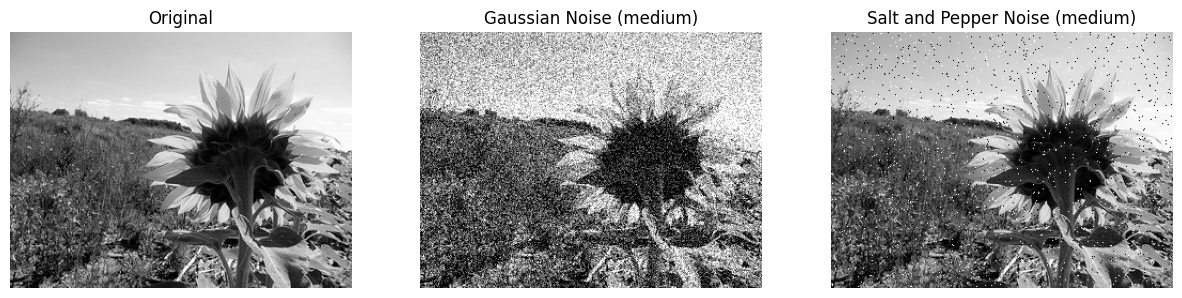

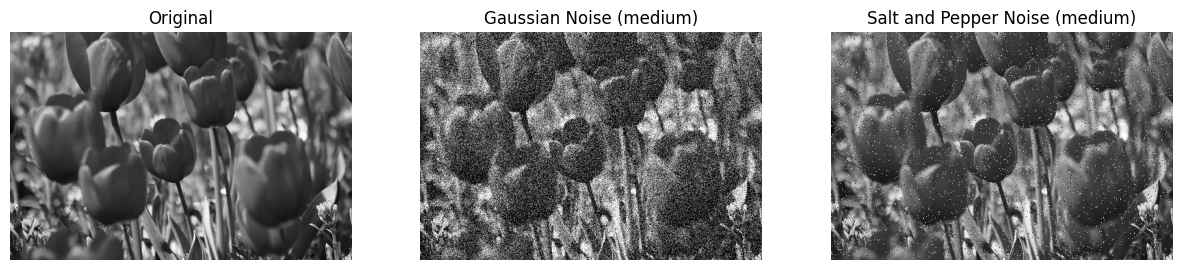

In [12]:
# Define the noise types to display

noise_types = ['Gaussian Noise (medium)', 'Salt and Pepper Noise (medium)']

# Iterate over all images
for i, image in enumerate(list_of_images):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Display the original image
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')
    
    # Display the noisy variants
    for j, noise_type in enumerate(noise_types):
        noisy_image = dataframes[i].loc[noise_type, 'Image']
        axes[j + 1].imshow(noisy_image, cmap='gray')
        axes[j + 1].set_title(noise_type)
        axes[j + 1].axis('off')
    
    plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error


def plot_metric(image):

    noise_intensity = ['low', 'medium', 'high']
    noise_types = ['Gaussian', 'Salt and Pepper']

    # Define the kernel sizes to test
    kernel_sizes = [(2*i + 1, 2*i + 1) for i in range(1, 10)]

    # Initialize dictionaries to store MSE values
    mse_gaussian = []
    mse_box = []
    mse_median = []

    # Calculate MSE for each kernel size
    for kernel_size in kernel_sizes:
        
        # Calculate MSE
        mse_box.append(mean_squared_error(image.flatten(), box_filtered.flatten()))
        mse_median.append(mean_squared_error(image.flatten(), median_filtered.flatten()))
        mse_gaussian.append(mean_squared_error(image.flatten(), gaussian_filtered.flatten()))

    # Plot the MSE vs kernel size
    plt.figure(figsize=(10, 6))
    plt.plot([ks[0] for ks in kernel_sizes], mse_box, label='Box Filter', color='blue')
    plt.plot([ks[0] for ks in kernel_sizes], mse_median, label='Median Filter', color='green')
    plt.plot([ks[0] for ks in kernel_sizes], mse_gaussian, label='Gaussian Filter', color='red')
    plt.xlabel('Kernel Size')
    plt.ylabel('MSE')
    plt.title('MSE vs Kernel Size for Different Filters')
    plt.legend()
    plt.show()

In [36]:
filter_types = os.listdir(os.path.join('Images_filtered', 'image_0', 'low', 'Gaussian'))
filter_types

name_without_extension = os.path.splitext('image_0_Gaussian_low_box_filter_k3.png')[0]
parts = name_without_extension.split('_')[-1]
kernel_size = int(parts[1])
kernel_size

3

In [ ]:

# noise_types = os.listdir(os.path.join(base_dir, original_image_name, 'low'))
# noise_levels = os.listdir(os.path.join(base_dir, original_image_name))
# filter_types = os.listdir(os.path.join(base_dir, original_image_name, , 'Gaussian'))